<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/Inequalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph $\to$ Identifying Restrictions

We now have a graph representation of the model. We are ready to derive workable _identifying restrictions_.

First, we need some preparation.


1.   List all $U$-nodes. (e.g., {a,b,c,d,e})
2.   Compute the probability distribution over them (e.g., $F_\theta(a)=0.1,F_\theta(b)=0.2,\dots$ )


Once that's done, we can compute a lower bound for the conditional probability of any event. Let $A$ be a set of $Y$-nodes. For example, $A=\{(1,0)\}$ in the entry game.

3. Find the $U$-nodes that direct links only to $A$ and no other $Y$-nodes. We call them _exclusive $U$-nodes_ (associated with $A$).
4. Sum up the probabilities allocated to such $U$-nodes.

The probability calculated in 4. is then the _sharp lower bound_ for $p(A|x)$. This is because whenever $U$ falls into


##Remark
We can modify Step 3 to obtain a sharp upper bound as well. To obtain an upper bound, find the $U$-nodes that has some flow into $A$. Summing up the probability masses allocated to such nodes gives the sharp upper bound. It turns out that getting the lower bound is enough.)

# Example: Entry game

For the first two steps,

1. The $U$-nodes are the five green nodes ({a,b,c,d,e});
2. Let's suppose the probability allocation is  $(F_\theta(a),F_\theta(b),F_\theta(c),F_\theta(d),F_\theta(e))=(0.1, 0.2, 0.3, 0.15, 0.25)$.

Consider $A=\{(1,0)\}$. The graph can be plotted again by executing the codes below. The event of interest is indicated by a red dotted circle.

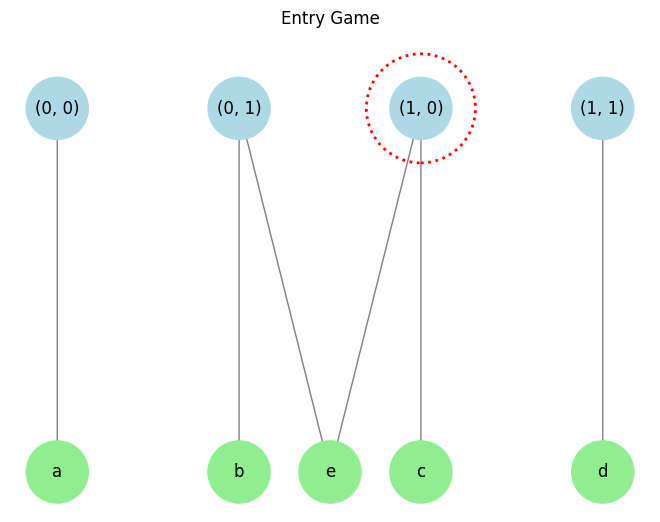

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the Y-nodes without LaTeX formatting
Y_nodes = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Define the U-nodes without LaTeX formatting
U_nodes = ['a', 'b', 'c', 'd', 'e']

# Create a bipartite graph
B = nx.Graph()

# Add Y-nodes and U-nodes to the graph with the node attribute "bipartite"
B.add_nodes_from(Y_nodes, bipartite=0)  # Add nodes for set Y
B.add_nodes_from(U_nodes, bipartite=1)  # Add nodes for set U

# Add edges between nodes
edges = [
    ('a', (0, 0)),
    ('b', (0, 1)),
    ('c', (1, 0)),
    ('d', (1, 1)),
    ('e', (0, 1)),
    ('e', (1, 0))
]
B.add_edges_from(edges)

# Define positions for the nodes in a bipartite layout
pos = {
    (0, 0): (-1.5, 1), (0, 1): (-0.5, 1), (1, 0): (0.5, 1), (1, 1): (1.5, 1),
    'a': (-1.5, -1), 'b': (-0.5, -1),
    'c': (0.5, -1), 'd': (1.5, -1),
    'e': (0, -1)
}

# Draw the graph
nx.draw(B, pos, with_labels=True, labels={node: node for node in B.nodes()},
        node_color=['lightblue'] * 4 + ['lightgreen'] * 5, node_size=2000, font_size=12, font_color='black', edge_color='gray', arrows=True)

# Add a red dotted circle around the node (1, 0)
circle = plt.Circle(pos[(1, 0)], radius=0.3, color='red', fill=False, linestyle='dotted', linewidth=2)
plt.gca().add_patch(circle)

# Show the plot
plt.title('Entry Game')
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()



3. The only $U$-node that directs a link to $(1,0)$ is $c$. (Note: $e$ directs a link to $(1,0)$, but it also directs a link to $(0,1)$. Hence, we do not include it in the nodes we consider.)
4. We compute $F_\theta(c)=0.3$, and this is the sharp lower bound for $p((1,0)|x)$. That is,

$$p((1,0)|x)\ge F_\theta(c)=0.3.$$

Now, let's consider $B=\{(0,0)\}$ and $C=\{(0,1),(1,0),(1,1)\}$. The graph is below.

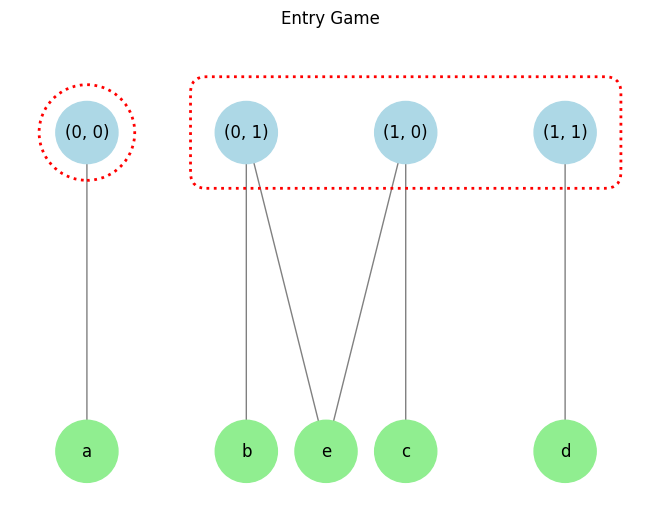

In [2]:
from matplotlib.patches import FancyBboxPatch

# Draw the graph
nx.draw(B, pos, with_labels=True, labels={node: node for node in B.nodes()},
        node_color=['lightblue'] * 4 + ['lightgreen'] * 5, node_size=2000, font_size=12, font_color='black', edge_color='gray', arrows=True)

# Add a red dotted rectangle with rounded corners around the specified nodes
rect_x = -0.75  # X-coordinate of the lower left corner of the rectangle
rect_y = 0.75    # Y-coordinate of the lower left corner of the rectangle
rect_width = 2.5  # Width of the rectangle
rect_height = 0.5 # Height of the rectangle

# Add a red dotted circle around the node (0,0)
circle = plt.Circle(pos[(0,0)], radius=0.3, color='red', fill=False, linestyle='dotted', linewidth=2)
plt.gca().add_patch(circle)

# Create the FancyBboxPatch object
rounded_rect = FancyBboxPatch((rect_x, rect_y), rect_width, rect_height, boxstyle="round,pad=0.1",
                              edgecolor='red', facecolor='none', linestyle='dotted', linewidth=2)

# Add the rectangle to the plot
plt.gca().add_patch(rounded_rect)

# Save the plot
plt.title('Entry Game')
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()

3. For $B$, the only $U$-node directs a link to $\{(0,0)\}$ is $a$. For $C$, the $U$-nodes that directs links to $C$ are $b,c,d,e$.
4. By the previous step, we obtain
\begin{align}
p((0,0)|x)&\ge F_\theta(a)=0.1\\
p(C|x)&\ge F_\theta(b)+F_\theta(c)+F_\theta(d)+F_\theta(e)=0.9.
\end{align}

Note that $B=\{(0,0)\}=\bar C$ (the complement of $C$). Therefore, the last inequality can also be written as $p((0,0)|x)\le 1-p(C|x)\le 1-0.9=0.1$. Combining the two inequalities, we obtain an equality restriction
$$p((0,0)|x)=0.1.$$

Observe that there is a unique flow from $a$ to $(0,0)$. In such a case, we obtain an equality restriction.

# Finding the exclusive $U$-nodes in general

As shown above, for each event $A\subset \mathcal Y$, we want to find the $U$-nodes that are only directed to $A$. The following function does this.
The `BipartiteGraph` class in the `idc` library has an instance method that computes the exclusive $U$-nodes.

In [3]:
!git clone https://github.com/hkaido0718/IncompleteDiscreteChoice.git

fatal: destination path 'IncompleteDiscreteChoice' already exists and is not an empty directory.


In [4]:
import idclib_undi as idc
gentrymodel = idc.BipartiteGraph(Y_nodes,U_nodes,edges)

# Example usage
A = {(1,0),(0,1)}
exclusive_u_nodes = gentrymodel.get_exclusive_u_nodes(A)
print(exclusive_u_nodes)


{'c', 'b', 'e'}


# Obtaining the sharp identifying restrictions

To obtain the sharp identifying restrictions, we must take the following steps.

1. For each event $A\subseteq \mathcal Y$, find the exclusive $U$-nodes (source nodes) that direct links to $A$;
2. Sum up the probabilities allocated to the source nodes;
3. Use the sum as a lower bound for $p(A|x)$;
4. Repeat Steps 1-3 for all events.

Here is a code for Steps 1-3.

In [5]:
import numpy as np
# Define probabilities for the U-nodes
Ftheta = np.array([0.1, 0.2, 0.3, 0.15, 0.25])  # Example probabilities corresponding to U_nodes

# Example usage
total_prob = gentrymodel.sum_probabilities(exclusive_u_nodes,Ftheta)
print(total_prob)


0.75


The instance method `calculate_sharp_lower_bound` does Step 4.

In [6]:
results, sharp_lower_bounds = gentrymodel.calculate_sharp_lower_bound(Ftheta)

# print results
idc.print_table(results)

Subset of Y-nodes                    Exclusive U-nodes             Sharp Lower Bound  
{(0, 0)}                             {'a'}                         0.100              
{(0, 1)}                             {'b'}                         0.200              
{(1, 0)}                             {'c'}                         0.300              
{(1, 1)}                             {'d'}                         0.150              
{(0, 1), (0, 0)}                     {'a', 'b'}                    0.300              
{(1, 0), (0, 0)}                     {'c', 'a'}                    0.400              
{(1, 1), (0, 0)}                     {'d', 'a'}                    0.250              
{(0, 1), (1, 0)}                     {'c', 'b', 'e'}               0.750              
{(0, 1), (1, 1)}                     {'d', 'b'}                    0.350              
{(1, 0), (1, 1)}                     {'c', 'd'}                    0.450              
{(0, 1), (1, 0), (0, 0)}             {'c', 

# Remark:
From this list, we can obtain the sharp identifying restrictions as follows.
\begin{align}
P((0,0)|x)&\ge 0.1\\
\vdots\\
P((1,0),(0,1),(1,1)|x)&\ge 0.9\\
P((0,0),(1,0),(0,1),(1,1)|x)&\ge 1.
\end{align}

In practice, the right-hand side depends on $F_\theta$. We can check if the chosen value of $\theta$ is compatible with $P$ by checking the system of inequalities. We will discuss this in the next note.

We got 16 inequalities (if we include $P(\emptyset)\ge 0$), but many of them are actually redundant. It is possible to reduce them to a smaller class called the _minimal core determining class_. Working with this class is particularly appealing in large-scale models (e.g., a game with many players). We plan to discuss this in a separate note.

# References:

- Alfred Galichon, Marc Henry, "Set Identification in Models with Multiple Equilibria", _The Review of Economic Studies_, Volume 78, Issue 4, October 2011, Pages 1264–1298, https://doi.org/10.1093/restud/rdr008
- Luo, Ye, and Hai Wang. 2017. "Core Determining Class and Inequality Selection." _American Economic Review_, 107 (5): 274–77.
DOI: 10.1257/aer.p20171041
- Kirill Ponomarev (2024) "Selecting Inequalities for Sharp Identification in
Models with Set-Valued Predictions" U. Chicago, [paper](http://kponomarev.github.io/files_on_website/sharp%20inequalities.pdf).